In [4]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
#import imutils
import qrcode
from pyzbar.pyzbar import decode
from bokeh.plotting import figure
#from bokeh.io import output_notebook, show, push_note

In [6]:


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

float32
(600, 868)


(array([8.70000e+01, 4.70000e+02, 7.58900e+03, 5.10984e+05, 1.43100e+03,
        1.69000e+02, 5.10000e+01, 1.30000e+01, 4.00000e+00, 2.00000e+00]),
 array([-0.00518376, -0.00366466, -0.00214555, -0.00062645,  0.00089266,
         0.00241177,  0.00393087,  0.00544998,  0.00696908,  0.00848819,
         0.01000729], dtype=float32),
 <a list of 10 Patch objects>)

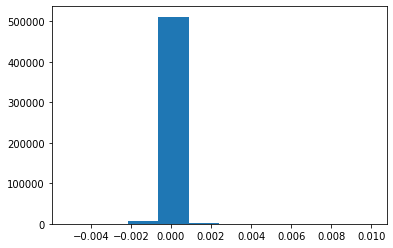

In [7]:
src = cv2.imread('./day6_rs/building.jpg', cv2.IMREAD_GRAYSCALE)

#  block 크기, 소벨크기, k=0.04~0.06, R= Det() - kTr() (Determinant - Trace)
# 이필터는 무엇인지?
harris = cv2.cornerHarris(src, 3, 3, 0.04) 
#Dtype of harris is float
print(harris.dtype)
print(harris.shape)
plt.hist(harris.ravel())

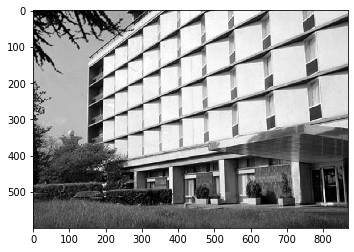

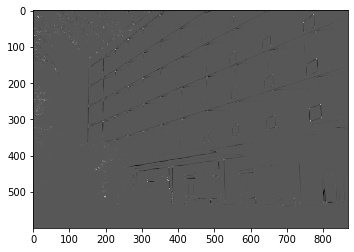

In [8]:
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
imshow("", src)
imshow("", harris_norm)

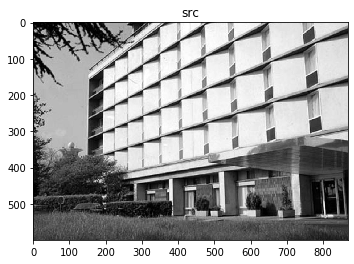

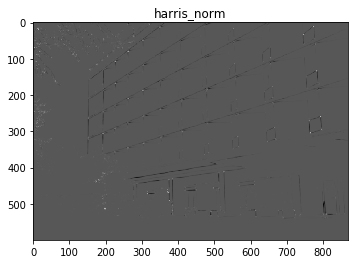

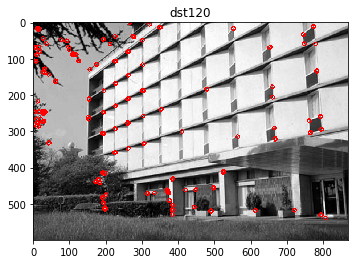

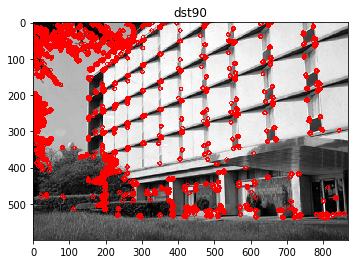

In [9]:
dst120 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst120, (x, y), 5, (0, 0, 255), 2)

dst90 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 90:
                    cv2.circle(dst90, (x, y), 5, (0, 0, 255), 2)
                    
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst120', dst120)
imshow('dst90', dst90)

float32
(490, 686)


(array([5.6500e+03, 1.4325e+04, 3.1595e+05, 9.5000e+01, 4.4000e+01,
        2.1000e+01, 2.6000e+01, 1.9000e+01, 6.0000e+00, 4.0000e+00]),
 array([-0.00114988, -0.00063836, -0.00012684,  0.00038467,  0.00089619,
         0.00140771,  0.00191923,  0.00243074,  0.00294226,  0.00345378,
         0.0039653 ], dtype=float32),
 <a list of 10 Patch objects>)

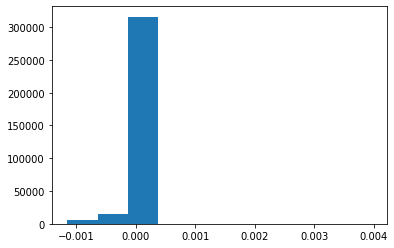

In [10]:
src = cv2.imread('./day6_rs/corner.png', cv2.IMREAD_GRAYSCALE)

#  block 크기, 소벨크기, k=0.04~0.06, R= Det() - kTr() (Determinant - Trace)
harris = cv2.cornerHarris(src, 3, 3, 0.04) 
#Dtype of harris is float
print(harris.dtype)
print(harris.shape)
plt.hist(harris.ravel())

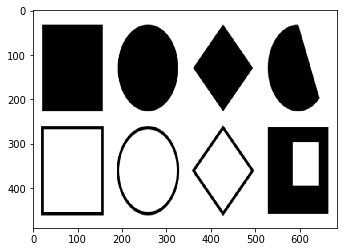

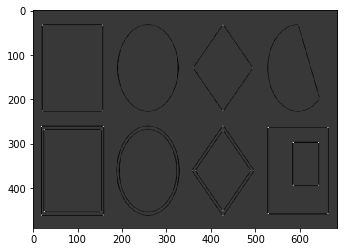

In [11]:

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
imshow("", src)
imshow("", harris_norm)

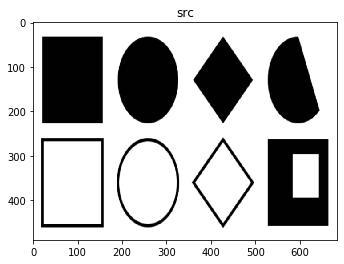

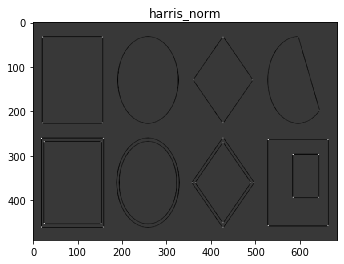

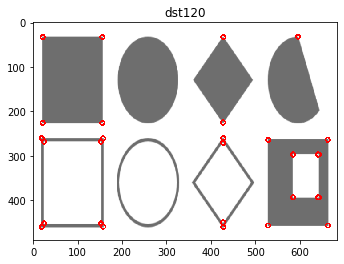

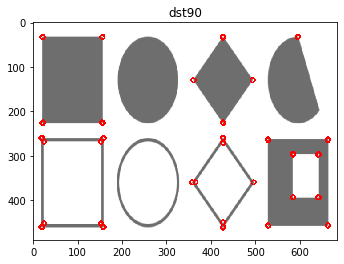

In [12]:

dst120 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
#120과 90의 차이는?
for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst120, (x, y), 5, (0, 0, 255), 2)

dst90 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 90:
                    cv2.circle(dst90, (x, y), 5, (0, 0, 255), 2)
                    
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst120', dst120)
imshow('dst90', dst90)

float32
(635, 828)


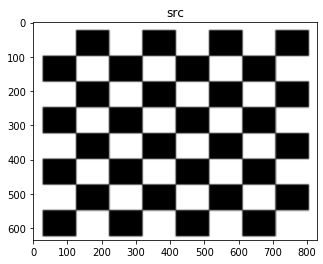

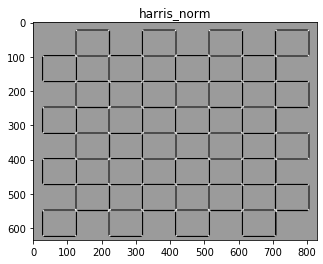

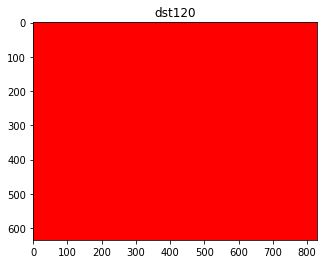

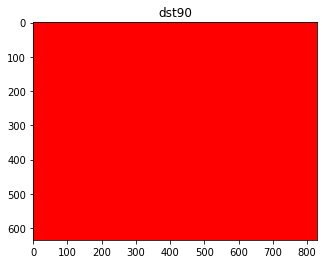

In [13]:
src = cv2.imread('./day6_rs/chessboardbasic.jpg', cv2.IMREAD_GRAYSCALE)
#Blur the image to see how it performs in various conditions
src = cv2.GaussianBlur(src, (11,11), 0)
#  block 크기, 소벨크기, k=0.04~0.06, R= Det() - kTr() (Determinant - Trace)
harris = cv2.cornerHarris(src, 3, 3, 0.04) 
#Dtype of harris is float
print(harris.dtype)
print(harris.shape)
plt.hist(harris.ravel())
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
dst120 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst120, (x, y), 5, (0, 0, 255), 2)

dst90 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 90:
                    cv2.circle(dst90, (x, y), 5, (0, 0, 255), 2)
                    
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst120', dst120)
imshow('dst90', dst90)

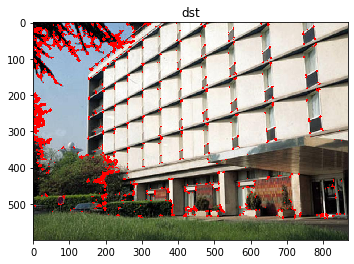

In [14]:
img = cv2.imread('./day6_rs/building.jpg')
gray = cv2.imread('./day6_rs/building.jpg', 0)
dst = cv2.cornerHarris(gray, 5, 3, 0.04)
#무슨의미?
#Numpy allows this expression: (much faster, simpler this way, made possible by Numpy framework)
img[dst > 0.01 * dst.max()] = [0,0,255]
imshow('dst', img)

In [15]:

#Let's make sense of that:
a = np.array([[1,2,4], [7,0,1]])
print(a)
b = a > 3
print(b)
#masking
a[b] = 100
print(a)

[[1 2 4]
 [7 0 1]]
[[False False  True]
 [ True False False]]
[[  1   2 100]
 [100   0   1]]


851
(160.0, 3.0)


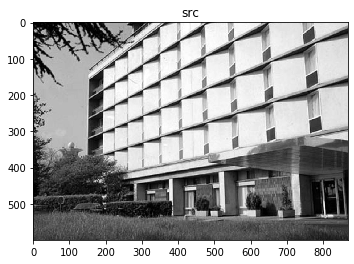

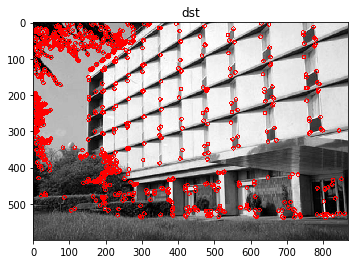

In [17]:

src = cv2.imread('./day6_rs/building.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
#faster by factor of 20
#무슨필터?
fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(src)
print(len(keypoints))
print(keypoints[0].pt) #otherwise return class, call method(.pt). it returns corner point(s)
x = keypoints[0].pt[0]
y = keypoints[0].pt[1]
#or, better:
x, y = keypoints[0].pt
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1])) #takes floats from above. necessary to turn them into int to draw circles.
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

(480, 640)


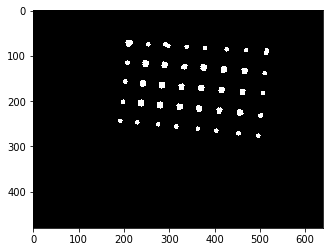

In [18]:

#마스크에서는 왜본거?
src = cv2.imread('./day6_rs/chessBoard2.jpg', cv2.IMREAD_GRAYSCALE)
fast = cv2.FastFeatureDetector_create(50)
keypoints = fast.detect(src)
mask = np.zeros(src.shape, dtype='uint8') #default type is not uint8
print(mask.shape)
for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1])) #takes floats from above. necessary to turn them into int to draw circles.
        cv2.circle(mask, pt, 5, (255, 255, 255), -1)
        
imshow("", mask)

float32
(1060, 1060)


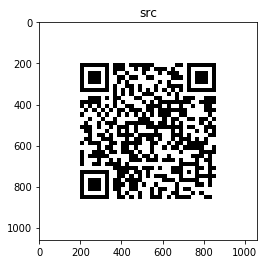

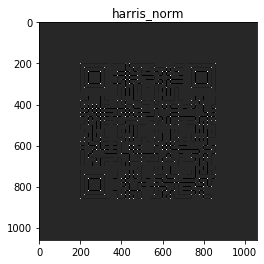

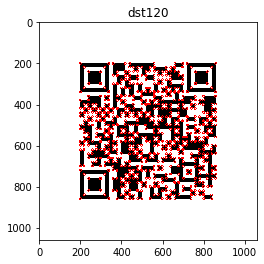

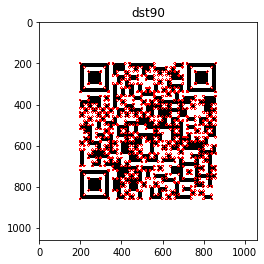

In [20]:
src = cv2.imread('./day6_rs/acronet.png', cv2.IMREAD_GRAYSCALE)

#  block 크기, 소벨크기, k=0.04~0.06, R= Det() - kTr() (Determinant - Trace)
harris = cv2.cornerHarris(src, 3, 3, 0.04) 
#Dtype of harris is float
print(harris.dtype)
print(harris.shape)
plt.hist(harris.ravel())
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
dst120 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst120, (x, y), 5, (0, 0, 255), 2)

dst90 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 90:
                    cv2.circle(dst90, (x, y), 5, (0, 0, 255), 2)
                    
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst120', dst120)
imshow('dst90', dst90)

#even when case QR Code is tilted aside, the algorithm revert it to its appropriate position

 * qr코드 인식
  > pip install qrcode
 * import 
  >import qrcode
 
>출석체크 qr는 날짜에 맞추어서 매일변함

* 인식단계
 1. 코너점 찾기
 2. 코너점 검사(회전된 영역포힘)
 3. 디코딩
 
사이즈변경및 정보에 변경이 되면 인식을 못함
png(비손실압축) 확대시 깨끗함
jpg(손실압축) 확대시 깨끗하지않음 
성능검사 -> 오류에 얼마나 잘 동작하는지
중간에 잘못된 문자를 인식할수 없기 때문에 내가 디코딩한것과 카드의 crc와 일치하는지 확인한다.


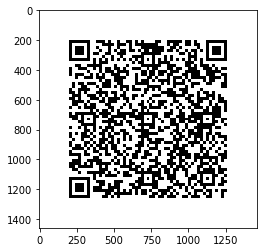

In [61]:

qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 20,
     border = 10)

# qr 코드 인식시 연결될 url /길이 제한 있음
# 한글인 인코딩이 됨
url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8'
qr.add_data(url)

qr.make()
#이미지 객체 생성
img = qr.make_image(fill_color="black", back_color="white")

#url 글씨양이 많을수록 qr패턴이 많아짐
plt.imshow(img, cmap="gray")
img.save("qrcode3.png")


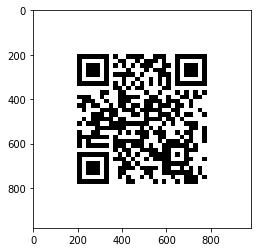

In [63]:
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 20,
     border = 10)
#https://www.naver.com/
url = 'https://www.naver.com/'
qr.add_data(url)

qr.make()
#이미지 객체 생성
img = qr.make_image(fill_color="black", back_color="white")

#url 글씨양이 많을수록 qr패턴이 많아짐
plt.imshow(img, cmap="gray")
img.save("qrcode.png")

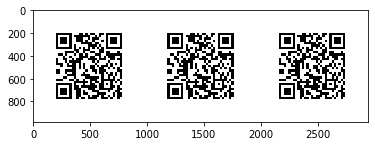

In [33]:

img.save("qrcode.png")
img = cv2.imread("qrcode.png")
img = np.hstack([img, img, img])
cv2.imwrite("3.png", img)
imshow("", img)

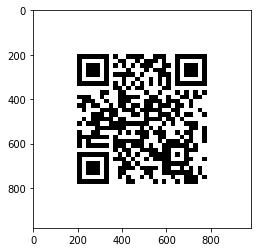

(980, 980, 3)
<QRCodeDetector 0000024136837CD0>
https://www.naver.com/


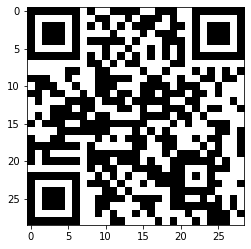

In [64]:
image = cv2.imread('qrcode.png')
imshow("",image)
print(image.shape)
qrDecoder = cv2.QRCodeDetector()
print(qrDecoder)
# qr코드 코너 영역을 찾아줌
#data - > qr코드의 문자내역  bbox -> 어느영역에 qr코드가 있는지,  rectifiedImage-> 회전된 것을 되돌려줌
data,bbox,rectifiedImage=  qrDecoder.detectAndDecode(image)
print(data)

imshow("",rectifiedImage)

[Decoded(data=b'http://www.acronet.kr/24987', type='QRCODE', rect=Rect(left=201, top=201, width=658, height=658), polygon=[Point(x=201, y=201), Point(x=201, y=859), Point(x=859, y=859), Point(x=859, y=201)])]


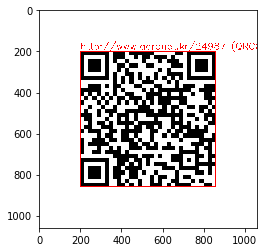

In [7]:
#opencv보다 성능이잘나옴
#c++ 깔기
from pyzbar.pyzbar import decode

image = cv2.imread('./day6_rs/acronet.png')
# 사이즈가 작거나 블러가 많이 되어있으면 인식을 잘 하지 못함
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    #찾은 사각형 기록
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    # 읽은 내용 기록
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)

[Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)]), Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)]), Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)]), Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)]), Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)]), Decoded(data=b

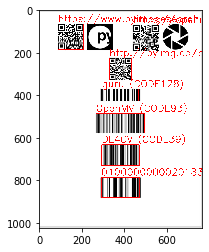

In [8]:
from pyzbar.pyzbar import decode

image = cv2.imread('./day6_rs/acronet.png')
image = cv2.GaussianBlur(image, (51,51), 0)
image = cv2.imread('./day6_rs/barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)

len(keypoints): 500
desc.shape: (500, 32)


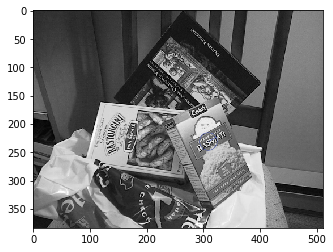

[ 93  89 127 161 134  90 182 224 108  96 119 162  95  30 163  41  51 213
 164 243  85 181  45 110 254 167  99  71 229  59  45  71]


In [12]:
src = cv2.imread('./day6_rs/box_in_scene.png', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
keypoints = orb.detect(src)
keypoints, desc = orb.compute(src, keypoints)


print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)

keypoints = keypoints[0:1]

dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst)
print(desc[0])

In [13]:
print(type(keypoints[0]))
print(type(desc))    # 포인트갯수x 32바이트
print(keypoints1[171].pt)   # 171번째 점


imshow('src', src)
imshow('dst', dst)

<class 'cv2.KeyPoint'>
<class 'numpy.ndarray'>


IndexError: list index out of range

desc1.shape: (453, 32)
desc2.shape: (500, 32)


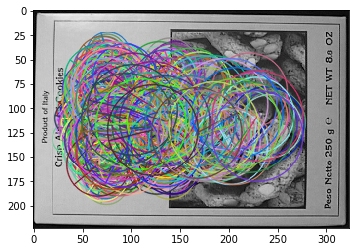

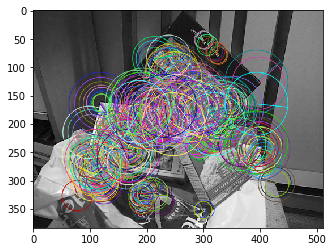

In [15]:
src1 = cv2.imread('./day6_rs/box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./day6_rs/box_in_scene.png', cv2.IMREAD_GRAYSCALE)    
#src1 = cv2.imread('book3.jpg', cv2.IMREAD_GRAYSCALE)
#src2 = cv2.imread('book3_1.jpg', cv2.IMREAD_GRAYSCALE)
    
orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print('desc1.shape:', desc1.shape)
print('desc2.shape:', desc2.shape)


dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
imshow("", dst2)





In [16]:
print(keypoints1[171].pt)
print(desc1[171])

print(keypoints2[171].pt)
print(desc2[171])




(56.400001525878906, 134.40000915527344)
[103 153 226  94 193 208  86 176 121  66 254  18 106 254  46 116  93 250
 182 194 221  47 246 227  19  62 144  75 127 173 248  70]
(121.20000457763672, 297.6000061035156)
[169  30  14  49 184 251 145 119 188 239 246 253 159   6 130 153 206  34
 206  52 189 207  97  12 236 195 122 209 202  76 175 217]


In [23]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
#가장가까운 거리를 매칭
matches = matcher.match(desc1, desc2)

print(len(matches))

#매칭되 ㄴ데이터
print(matches[0].queryIdx)
print(matches[0].trainIdx)
print(matches[0].distance)

#물리값
print(keypoints1[matches[0].queryIdx].pt)
print(keypoints2[matches[0].trainIdx].pt)

for m in matches :
    print(f"{m.queryIdx} / {m.trainIdx}  / {m.distance}")
    


426
0
170
62.0
(70.0, 57.0)
(278.4000244140625, 241.20001220703125)
0 / 170  / 62.0
1 / 433  / 69.0
2 / 492  / 66.0
3 / 471  / 73.0
4 / 466  / 82.0
5 / 378  / 73.0
6 / 415  / 56.0
7 / 192  / 88.0
8 / 16  / 65.0
9 / 424  / 86.0
10 / 90  / 73.0
11 / 446  / 83.0
12 / 413  / 70.0
13 / 346  / 86.0
14 / 465  / 80.0
15 / 230  / 86.0
16 / 30  / 54.0
17 / 86  / 75.0
18 / 90  / 68.0
19 / 345  / 70.0
20 / 51  / 82.0
21 / 321  / 61.0
22 / 236  / 71.0
23 / 190  / 82.0
24 / 456  / 70.0
25 / 46  / 75.0
26 / 136  / 85.0
27 / 486  / 77.0
28 / 483  / 67.0
29 / 328  / 73.0
30 / 430  / 80.0
31 / 39  / 68.0
32 / 136  / 80.0
33 / 21  / 59.0
34 / 266  / 69.0
35 / 472  / 73.0
36 / 7  / 71.0
37 / 7  / 63.0
38 / 411  / 78.0
39 / 345  / 72.0
40 / 405  / 72.0
41 / 456  / 70.0
42 / 107  / 78.0
43 / 427  / 66.0
44 / 485  / 62.0
45 / 22  / 58.0
46 / 82  / 79.0
47 / 208  / 63.0
48 / 217  / 80.0
49 / 16  / 70.0
50 / 368  / 58.0
51 / 288  / 90.0
52 / 111  / 87.0
53 / 475  / 62.0
54 / 452  / 63.0
55 / 475  / 59.0
56 / 4

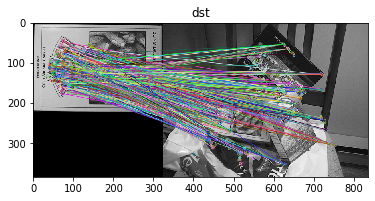

True

In [18]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)

imshow('dst', dst)
cv2.imwrite("orb.png", dst)

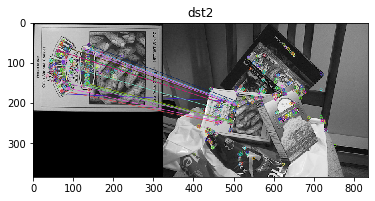

True

In [19]:
#거리가 0에 가까운 순으로 정렬하고 20개만 뽑음
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:20]

dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('dst2', dst2)
cv2.imwrite("orb2.png", dst2)

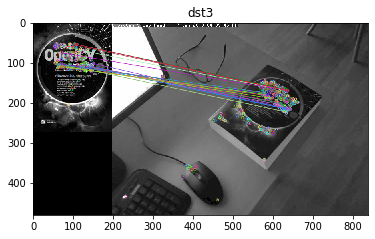

True

In [21]:
src1 = cv2.imread('./day6_rs/book3.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./day6_rs/book3_1.jpg', cv2.IMREAD_GRAYSCALE)
    
orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:20]

dst3 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('dst3', dst3)
cv2.imwrite("orb3.png", dst3)

### 파노라마